# Predicting Wine Quality

We want to predict the quality of a wine, so for this dataset, you must split it into a train and test set. Leave the test set till the very end to check model performance!

1) Perform EDA to get an idea as to what the underlyng patterns may be between a good and bad wine

> Remember, our squishy human brains can only contend with a few variables at a time, so the ultimate objective is to build a model that codifies the patterns present accross SEVERAL variables, to build a roboust predictor of wine quality

2) Clean Data

> Remember, We want to have our data be as clean as possible, remove NaNs, group sparse classes, etc...
> Reductive Process

3) Engineer Features

> Create new features that add value to your data, no redundant features!!
> Creatuive Process

4) Run Models

> You may have to repeat the steps above if your model is underperforming

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
df = pd.read_csv('Wine_Quality.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null object
dtypes: float64(11), object(2)
memory usage: 659.9+ KB


In [5]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Average
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Average
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Average
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Average
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Average
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Average
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Average
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Average
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Average
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,Average


In [67]:
df = df.dropna()

In [68]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
qlt_num                 0
dtype: int64

<br>

In [17]:
df.shape

(6497, 13)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [26]:
df.groupby('quality').describe().T

quality                     Average         High          Low
fixed acidity    count  2832.000000  1276.000000  2379.000000
                 mean      7.178037     7.086403     7.332282
                 std       1.291691     1.343130     1.268330
                 min       3.800000     3.900000     4.200000
                 25%       6.400000     6.300000     6.500000
                 50%       6.900000     6.900000     7.100000
                 75%       7.600000     7.400000     7.800000
                 max      14.300000    15.600000    15.900000
volatile acidity count  2832.000000  1275.000000  2382.000000
                 mean      0.313731     0.289251     0.397555
                 std       0.147025     0.116949     0.187981
                 min       0.080000     0.080000     0.100000
                 25%       0.210000     0.200000     0.260000
                 50%       0.270000     0.270000     0.340000
                 75%       0.370000     0.340000     0.500000
                 max       1.040000     0.915000     1.580000
citric acid      count  2834.000000  1277.000000  2383.000000
                 mean      0.323786     0.334628     0.304175
                 std       0.142341     0.110040     0.162970
                 min       0.000000     0.000000     0.000000
                 25%       0.260000     0.280000     0.210000
                 50%       0.310000     0.320000     0.290000
                 75%       0.390000     0.380000     0.400000
                 max       1.660000     0.760000     1.000000
residual sugar   count  2835.000000  1276.000000  2384.000000
                 mean      5.551182     4.829702     5.646225
                 std       4.888507     4.064801     4.917239
                 min       0.700000     0.800000     0.600000
                 25%       1.800000     1.800000     1.800000
                 50%       3.100000     2.900000     2.900000
...                             ...          ...          ...
density          std       0.003035     0.003007     0.002464
                 min       0.987580     0.987110     0.987220
                 25%       0.992200     0.990720     0.993960
                 50%       0.994700     0.992280     0.996000
                 75%       0.996740     0.995000     0.997540
                 max       1.038980     1.003200     1.003150
pH               count  2832.000000  1275.000000  2381.000000
                 mean      3.217701     3.227412     3.214393
                 std       0.161038     0.159064     0.161180
                 min       2.720000     2.840000     2.740000
                 25%       3.110000     3.120000     3.110000
                 50%       3.210000     3.220000     3.200000
                 75%       3.320000     3.340000     3.310000
                 max       4.010000     3.820000     3.900000
sulphates        count  2834.000000  1277.000000  2382.000000
                 mean      0.532466     0.541488     0.524219
                 std       0.146730     0.161521     0.143793
                 min       0.230000     0.220000     0.250000
                 25%       0.430000     0.420000     0.440000
                 50%       0.510000     0.510000     0.500000
                 75%       0.600000     0.640000     0.580000
                 max       1.950000     1.360000     2.000000
alcohol          count  2836.000000  1277.000000  2384.000000
                 mean     10.587553    11.433359     9.873544
                 std       1.126491     1.215620     0.841746
                 min       8.400000     8.500000     8.000000
                 25%       9.600000    10.700000     9.300000
                 50%      10.500000    11.500000     9.600000
                 75%      11.400000    12.400000    10.400000
                 max      14.000000    14.200000    14.900000

[88 rows x 3 columns]

In [20]:
df['quality'].value_counts()

Average    2836
Low        2384
High       1277
Name: quality, dtype: int64

### This is a multilabel classification task!

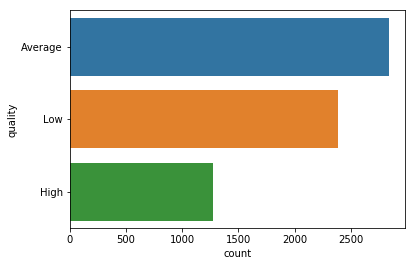

In [9]:
sns.countplot(y = df['quality'])
plt.show()

### EDA

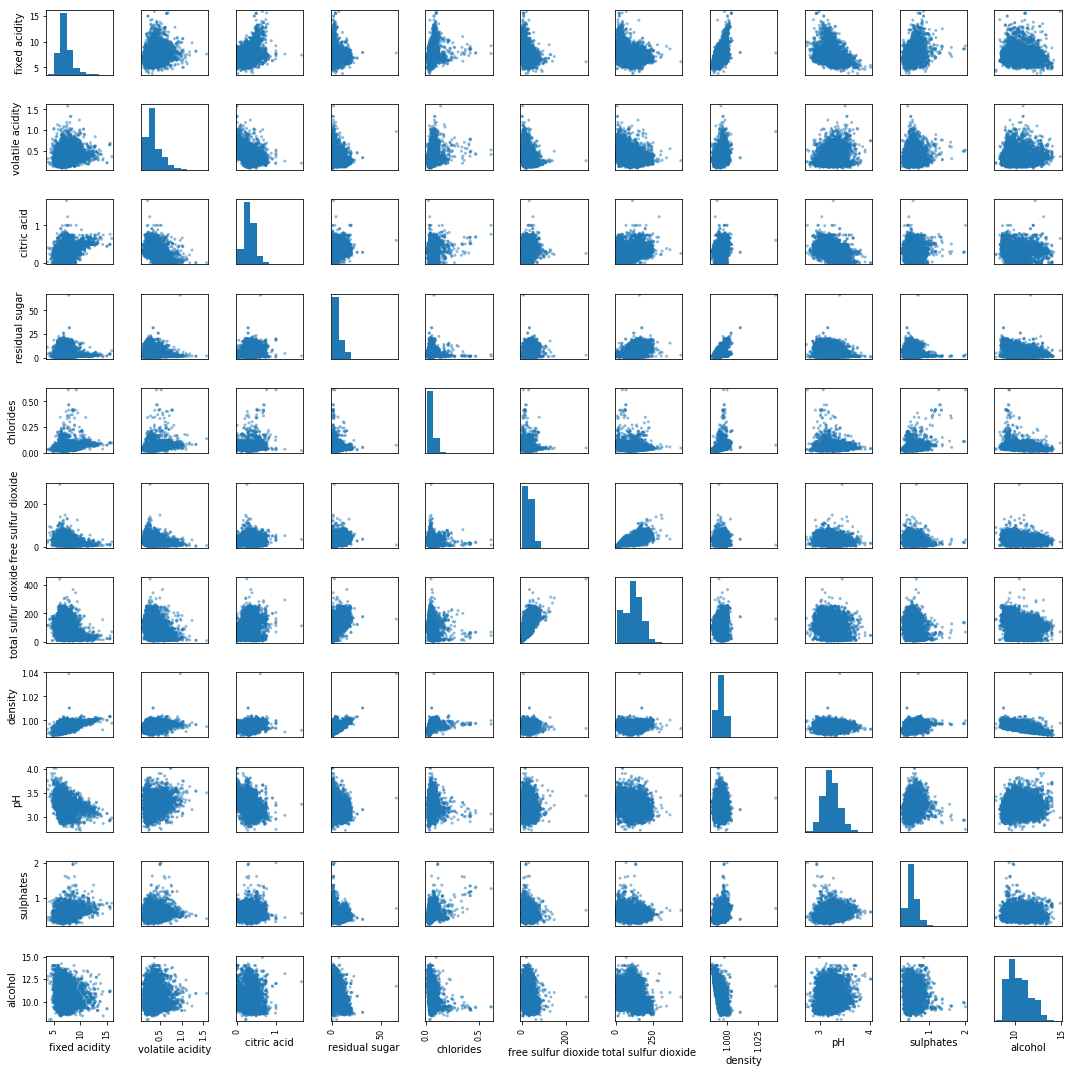

In [11]:
pd.plotting.scatter_matrix(df)
fig = plt.gcf()
fig.set_size_inches(15,15)
fig.tight_layout()
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')
plt.show()

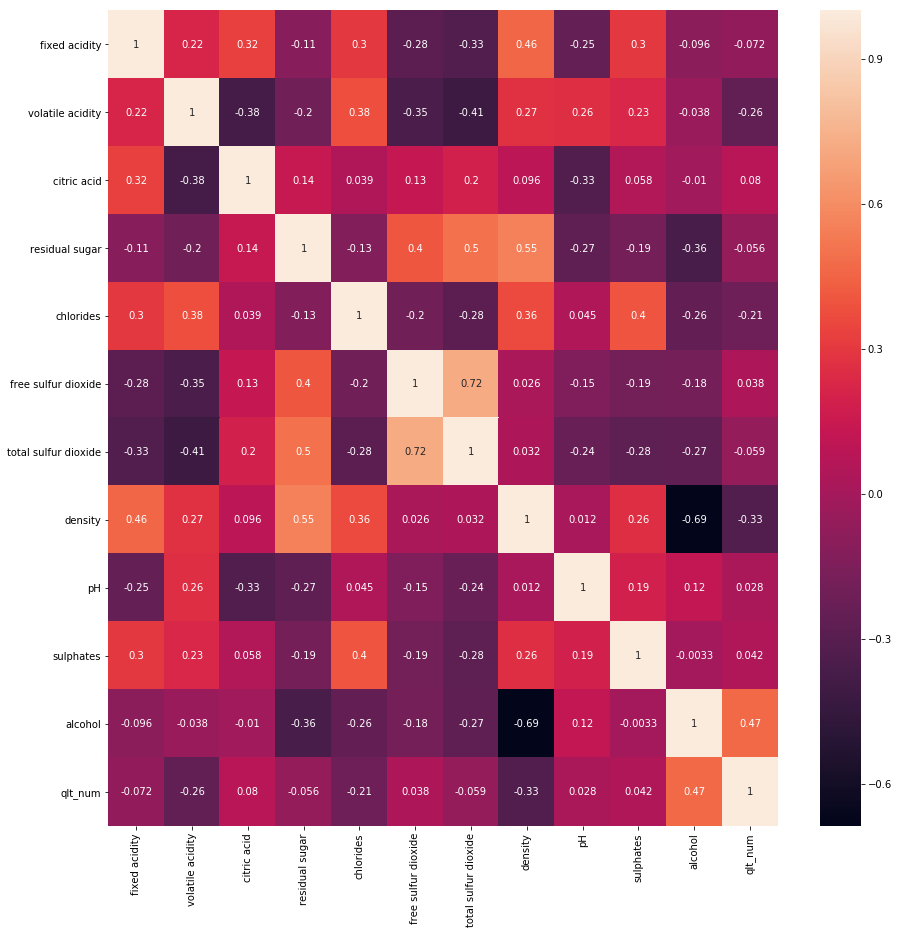

In [30]:
fig = plt.figure(figsize=(15,15))
my_ax = fig.gca()
sns.heatmap(data = df.corr(), annot=True, ax=my_ax)
plt.show()

In [27]:
df['qlt_num'] = df['quality'].replace(['Low','Average','High'], [1,2,3])

In [35]:
corr_columns = ['volatile acidity', 'chlorides', 'density', 'alcohol',  'qlt_num']

In [69]:
df_correlated = df[corr_columns]

In [70]:
df_correlated.head()

,volatile acidity,chlorides,density,alcohol,qlt_num
0,0.27,0.045,1.0010,8.8,2
1,0.30,0.049,0.9940,9.5,2
2,0.28,0.050,0.9951,10.1,2
3,0.23,0.058,0.9956,9.9,2
4,0.23,0.058,0.9956,9.9,2


In [40]:
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingRegressor  

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline 

from sklearn.preprocessing import StandardScaler

In [71]:
X = df_correlated.drop(['qlt_num'], axis=1)
y = df_correlated['qlt_num']

In [72]:
X.head()

,volatile acidity,chlorides,density,alcohol
0,0.27,0.045,1.0010,8.8
1,0.30,0.049,0.9940,9.5
2,0.28,0.050,0.9951,10.1
3,0.23,0.058,0.9956,9.9
4,0.23,0.058,0.9956,9.9


In [73]:
X_train, X_test, y_train, y_test  =  train_test_split(X.values, y.values, test_size=0.2,  

                                                    random_state=123,  

                                                    stratify=y)

In [52]:
pipeline_dict  = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123 ))
}

## Randomized Search

In [106]:
hp_dict_rand = {
    "rf": {
        'randomforestclassifier__n_estimators': [50,100,200,300,400,500],
        'randomforestclassifier__max_depth': [None,1,2,3,4,5,6,7,8,9,10,25,50,100], 
        'randomforestclassifier__min_samples_split': [2,3,4,5,6,7,8,9,10,25,50,100], 
        'randomforestclassifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,25,50,100],
        'randomforestclassifier__max_features':['sqrt','log2', None]
        
    },
    "gb":{
        'gradientboostingclassifier__n_estimators': [50,100,200,300,400,500],
        'gradientboostingclassifier__max_depth': [None,1,2,3,4,5,6,7,8,9,10,25,50,100], 
        'gradientboostingclassifier__min_samples_split': [2,3,4,5,6,7,8,9,10,25,50,100], 
        'gradientboostingclassifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,25,50,100],
        'gradientboostingclassifier__max_features':['sqrt','log2', None],
        'gradientboostingclassifier__learning_rate': [50, 10, 1, 0.1, 0.01, 0.03, 0.001, 0.003, 0.0001]
    }
}

## CV 

In [108]:
sim_fitted = {}
for model_name, pipeline in pipeline_dict.items():
    model = RandomizedSearchCV(estimator = pipeline, param_distributions = hp_dict_rand[model_name], cv=10, verbose=2)
    model.fit(X_train, y_train)
    sim_fitted[model_name] = model
    print(model_name, 'has been fitted')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9, total=   1.7s
[CV] randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9, total=   1.7s
[CV] randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9 
[CV]  randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9, total=   1.7s
[CV] randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_depth=9 
[CV]  randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=4, randomforestc

[CV]  randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=9, total=   1.1s
[CV] randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=9 
[CV]  randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=9, total=   1.1s
[CV] randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=9 
[CV]  randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, rando

[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=4, randomforestclassifier__min_samples_leaf=50, randomforestclassifier__max_features=log2, randomforestclassifier__max_depth=100, total=   0.2s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=10, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=None 
[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=10, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=None, total=   0.7s
[CV] randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=10, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=None 
[CV]  randomforestclassifier__n_estimators=100, randomforestclassifier__min_samples_split=1

[CV]  randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=100, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=8, total=   1.9s
[CV] randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=100, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=8 
[CV]  randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=100, randomforestclassifier__min_samples_leaf=100, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=8, total=   1.8s
[CV] randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=8, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__max_features=log2, randomforestclassifier__max_depth=10 
[CV]  randomforestclassifier__n_estimators=400, randomforestclassifier__min_samples_split=8, 

[CV]  randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__max_features=log2, randomforestclassifier__max_depth=10, total=   1.1s
[CV] randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__max_features=log2, randomforestclassifier__max_depth=10 
[CV]  randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__max_features=log2, randomforestclassifier__max_depth=10, total=   1.1s
[CV] randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__max_features=log2, randomforestclassifier__max_depth=10 
[CV]  randomforestclassifier__n_estimators=300, randomforestclassifier__min_samples_split=3, randomfor

[CV]  randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=50, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=1, total=   0.8s
[CV] randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=50, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=1 
[CV]  randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=50, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=1, total=   0.8s
[CV] randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=2, randomforestclassifier__min_samples_leaf=50, randomforestclassifier__max_features=None, randomforestclassifier__max_depth=1 
[CV]  randomforestclassifier__n_estimators=500, randomforestclassifier__min_samples_split=2, randomfor

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


rf has been fitted
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__min_samples_split=8, gradientboostingclassifier__min_samples_leaf=10, gradientboostingclassifier__max_features=log2, gradientboostingclassifier__max_depth=100, gradientboostingclassifier__learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter gradientboostingclassifier for estimator Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

## Best Params?

In [ ]:
for model_name, sim_fitted in sim_fitted.items():
    print("model accuracy for", model_name)
    print(sim_fitted_model.best_socore_)
    print("Best_Params for", model_name)
    for hyper, value in sim_fitted_model.best:

# ...